### Dealing With Outlair

In [1]:
import pandas as pd

* Deleteting the Data Points

In [2]:
data = pd.read_csv("titanic_train.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_train.csv'

In [ ]:
data.shape

(891, 12)

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data['Fare']. quantile(0.25),data['Fare']. quantile(0.75)

(7.9104, 31.0)

In [ ]:
IQR = data['Fare']. quantile(0.75) - data['Fare']. quantile(0.25)
IQR

23.0896

### Inter Quantile Range

In [ ]:
Q1 = data['Fare']. quantile(0.25)
Q3 = data['Fare']. quantile(0.75)

Whisper_1 = Q1 - (1.5*IQR)
Whisper_2 = Q3 + (1.5*IQR)

Whisper_1  , Whisper_2

(-26.724, 65.6344)

In [ ]:
data.loc[data['Fare']>66]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [ ]:
data_new = data.loc[data['Fare']<66]
data.shape,data_new.shape

((891, 12), (775, 12))

In [ ]:
data["Fare"].loc[data['Fare']<66] = Q1

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data["Fare"].loc[data['Fare']<66]

0      7.9104
2      7.9104
3      7.9104
4      7.9104
5      7.9104
        ...  
886    7.9104
887    7.9104
888    7.9104
889    7.9104
890    7.9104
Name: Fare, Length: 775, dtype: float64

In [ ]:
data["Fare"][872]

7.9104

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


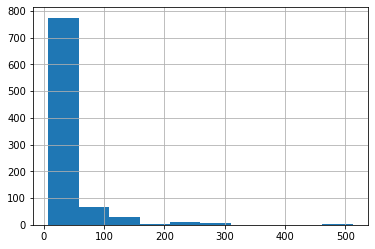

In [ ]:
data["Fare"].hist();

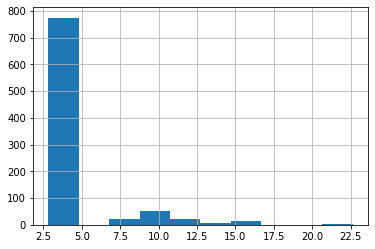

In [ ]:
(np.sqrt(data["Fare"])).hist();

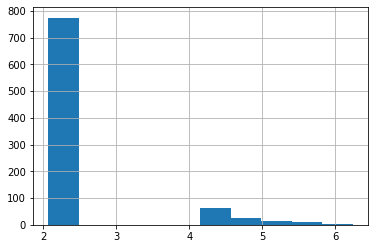

In [ ]:
(np.log(data["Fare"])).hist();

#                                                               KNN MODEL

### Relative Module

In [13]:
from sklearn.preprocessing import MinMaxScaler   # model scaling
from sklearn.model_selection import train_test_split   # model selection

In [14]:
from sklearn.linear_model import LinearRegression # model Building

In [15]:
from sklearn.metrics import accuracy_score   #model Evaluation

In [16]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  

In [ ]:
df = pd.read_csv('data_cleaned.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

x.shape , y.shape

((891, 24), (891,))

scaling using sklearn.preprocessing (maxminscaler)

In [ ]:
scaled = MinMaxScaler()
x_scaled = scaled.fit_transform(x)


In [ ]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.367921,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Step To Creating Dataset (Train And Test )

In [ ]:
train_x,test_x,train_y,test_y =train_test_split(x ,y , random_state=56 , stratify=y )

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as mse


In [ ]:
clf = KNN(n_neighbors=10) #Creating instance of KNN
#fitting the model
clf.fit(train_x,train_y)
#Preding over the train and calculate the f1 score
test_pridict = clf.predict(test_x)
k = f1_score(test_pridict,test_y)
print('Test_F1 score','',k)


Test_F1 score  0.7000000000000001


### Elbo for Clssifier

In [ ]:
def Elbow(k):
    # initiating Empty List
    test_Error = []
    #Traning Model for the  evalue value of k
    for i in k:
         #instance Of KNN
         clf = KNN(n_neighbors=1)
         clf.fit(train_x,train_y)
         #Appending  F1 core to a Empy List
         temp = clf.predict(test_x)
         temp = f1_score(temp,test_y)
         error = 1-temp
         test_Error.append(error)
    return test_Error

# Defining K Range

In [ ]:
k = range( 6,20,2)



In [ ]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve')

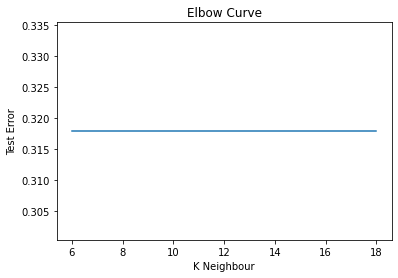

In [ ]:
#plotting the curve
plt.plot(k,test)
plt.xlabel('K Neighbour')
plt.ylabel('Test Error')
plt.title('Elbow Curve')

### Regration Problem

In [1]:
info = pd.read_csv("train_cleaned.csv")

NameError: name 'pd' is not defined

In [ ]:
info.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [6]:
info.shape

(8523, 46)

In [7]:
info.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
   

In [12]:
x = info.drop(['Item_Outlet_Sales'],axis=1)
y = info['Item_Outlet_Sales']
x.shape,y.shape

((8523, 45), (8523,))

### scaling the data using minmaxscaler

In [18]:
scaled = MinMaxScaler()
x_scaled = scaled.fit_transform(x)

In [24]:
x = pd.DataFrame(x_scaled)
x

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.321546,0.172914,0.777729,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8519,0.392506,0.143069,0.326263,0.708333,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8520,0.496487,0.107148,0.228492,0.791667,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8521,0.337705,0.442219,0.304939,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
train_x,test_x,train_y,test_y =train_test_split(x,y,random_state=56)

(8523, 8523)

### implementing KNN

In [44]:
from sklearn.metrics import mean_squared_error as mse

reg = KNN(n_neighbors=5)
reg.fit(train_x,train_y)
test_predict = reg.predict(test_x)
k = mse(test_predict,test_y)
print("test mse",k)

ValueError: Unknown label type: 'continuous'